In [10]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [11]:
# path to the client-hello-cipher-suites.csv file
file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_request_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/DNS/transID_plots'

In [12]:
df = pd.read_csv(file_path, sep='|')
df.tail()

Device                                            TransID
5         TribySpeaker  __64bd__02e6__5fed__5366__b5be__e074__a153__9c...
6           AmazonEcho  __234c__7abd__e3a0__e93f__3a5f__1f42__4869__2e...
7  WithingsSleepSensor  __7fcf__afc1__a14d__8d6b__52a5__c333__e84e__b8...
8        SamsungCamera  __fea8__c8c7__b9fc__6c11__231e__6a36__f2f7__f1...
9  WithingsBabyMonitor  __d1af__a1a9__faa4__69a8__7592__eb46__7efb__c9...

In [13]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transID = {}
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transID[device] = transIDs
        # print(f'devicess: {devices}')
            
        #     print(row[0])
        #     qnumber_dicts = row
            # continue

device_transID['AwairAirQuality'] = ['0000']
device_transID['LiFXBulb'] = ['0000']

for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['0000']
key: LiFXBulb, value: ['0000']
key: PixStarPhotoFrame, value: ['7314', '7ab5', '51c8', '05c4', 'd5d1', 'd8c2', 'ca49', '6532', 'cec5', 'eb45', '5743', '76b1', '523c', '4bc8', '22ec', '697a', '65a1', '860b', 'e302', 'd40a', '5f22', '084b', 'daa1', '64b1', 'be4e', 'd087', 'd29b', '6e4c', '8833', '2a1e', '1969', '8eda', 'ebfe', 'db98', 'e2f7', '9721', 'b18a', '22d6', '5940', '9d09', '6bc6', '757f', 'a941', '2039', '2cc8', '0e41', '2e59', '27b4', '48be', '1137', '3f3c', '001e', '8876', '0944', 'dc97', 'aeab', '7e91', '7585', '4ebf', 'a585', 'fc34', '32fe', '9a1f', 'd648', 'bfdf', '9032', 'a762', 'd5c4', '9fe0', '7109', '60f0', 'a0ef', '3734', '8f28', '630c', 'e2be', 'dd6f', '6e70', '6ea1', '4afc', 'e0b7', '9d25', 'e7af', '65f7', '6584', '45fb', '8f24', '716d', 'ca3d', '6bfb', '38f1', '893f', 'a4e3', '37a8', '0c08', '17f4', 'e809', 'c72c', '53ed', 'eb6f', '1efe', '4455', 'f72d', '0b2a', 'b7a9', '5732', '1271', '22db', '0cc4', '85d5', '9afa', '0f2d', '94

## Data Pre-Processing

In [14]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [15]:
for device, transID_list in device_transID.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_decimal(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        print(type(dec_val))
        if dec_val == 0:
            new_val = dec_val
        else:
            new_val = math.log2(dec_val)
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    device_transID[device] = newList

device: AwairAirQuality
i: 0, transID: 0000
<class 'int'>
device: LiFXBulb
i: 0, transID: 0000
<class 'int'>
device: PixStarPhotoFrame
i: 0, transID: 7314
<class 'int'>
i: 1, transID: 7ab5
<class 'int'>
i: 2, transID: 51c8
<class 'int'>
i: 3, transID: 05c4
<class 'int'>
i: 4, transID: d5d1
<class 'int'>
i: 5, transID: d8c2
<class 'int'>
i: 6, transID: ca49
<class 'int'>
i: 7, transID: 6532
<class 'int'>
i: 8, transID: cec5
<class 'int'>
i: 9, transID: eb45
<class 'int'>
i: 10, transID: 5743
<class 'int'>
i: 11, transID: 76b1
<class 'int'>
i: 12, transID: 523c
<class 'int'>
i: 13, transID: 4bc8
<class 'int'>
i: 14, transID: 22ec
<class 'int'>
i: 15, transID: 697a
<class 'int'>
i: 16, transID: 65a1
<class 'int'>
i: 17, transID: 860b
<class 'int'>
i: 18, transID: e302
<class 'int'>
i: 19, transID: d40a
<class 'int'>
i: 20, transID: 5f22
<class 'int'>
i: 21, transID: 084b
<class 'int'>
i: 22, transID: daa1
<class 'int'>
i: 23, transID: 64b1
<class 'int'>
i: 24, transID: be4e
<class 'int'>


i: 17587, transID: 98b7
<class 'int'>
i: 17588, transID: 2a84
<class 'int'>
i: 17589, transID: f6bb
<class 'int'>
i: 17590, transID: bba5
<class 'int'>
i: 17591, transID: 4b43
<class 'int'>
i: 17592, transID: 198a
<class 'int'>
i: 17593, transID: 9572
<class 'int'>
i: 17594, transID: 0f6b
<class 'int'>
i: 17595, transID: 206b
<class 'int'>
i: 17596, transID: cab8
<class 'int'>
i: 17597, transID: 3d0e
<class 'int'>
i: 17598, transID: 87f5
<class 'int'>
i: 17599, transID: defc
<class 'int'>
i: 17600, transID: abbc
<class 'int'>
i: 17601, transID: 43df
<class 'int'>
i: 17602, transID: 6bbc
<class 'int'>
i: 17603, transID: f594
<class 'int'>
i: 17604, transID: f599
<class 'int'>
i: 17605, transID: 5b5c
<class 'int'>
i: 17606, transID: 6649
<class 'int'>
i: 17607, transID: 9ad0
<class 'int'>
i: 17608, transID: 0c24
<class 'int'>
i: 17609, transID: d197
<class 'int'>
i: 17610, transID: 77d1
<class 'int'>
i: 17611, transID: a7ee
<class 'int'>
i: 17612, transID: c8d2
<class 'int'>
i: 17613, tr

In [16]:
for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

key: AwairAirQuality, value: [0]
key: LiFXBulb, value: [0]
key: PixStarPhotoFrame, value: [29460, 31413, 20936, 1476, 54737, 55490, 51785, 25906, 52933, 60229, 22339, 30385, 21052, 19400, 8940, 27002, 26017, 34315, 58114, 54282, 24354, 2123, 55969, 25777, 48718, 53383, 53915, 28236, 34867, 10782, 6505, 36570, 60414, 56216, 58103, 38689, 45450, 8918, 22848, 40201, 27590, 30079, 43329, 8249, 11464, 3649, 11865, 10164, 18622, 4407, 16188, 30, 34934, 2372, 56471, 44715, 32401, 30085, 20159, 42373, 64564, 13054, 39455, 54856, 49119, 36914, 42850, 54724, 40928, 28937, 24816, 41199, 14132, 36648, 25356, 58046, 56687, 28272, 28321, 19196, 57527, 40229, 59311, 26103, 25988, 17915, 36644, 29037, 51773, 27643, 14577, 35135, 42211, 14248, 3080, 6132, 59401, 50988, 21485, 60271, 7934, 17493, 63277, 2858, 47017, 22322, 4721, 8923, 3268, 34261, 39674, 3885, 37926, 17253, 35514, 57875, 33607, 35933, 6709, 34636, 17739, 8078, 35049, 54818, 42010, 26108, 61164, 43343, 43031, 60186, 51810, 22441, 10720, 

## Plotting

In [17]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    x_values = list(range(len(lst2D)))  # Use list indices as x-axis
    x_values = [x + 1 for x in x_values]
    y_values = lst2D  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    linstl = '-'
    mkr = '.'
    clr = 'b'
    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    plt.scatter(x_values, y_values, color=clr, marker=mkr, label='Data Points')

    plt.xlabel('Index of the offered list')
    plt.ylabel('Decimal equivalent of the hex code')
    # plt.title('Line Plot from List')
    plt.grid(True)

    x_values = np.array(x_values)
    even_xticks = x_values[x_values % 50 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


device_name: AwairAirQuality


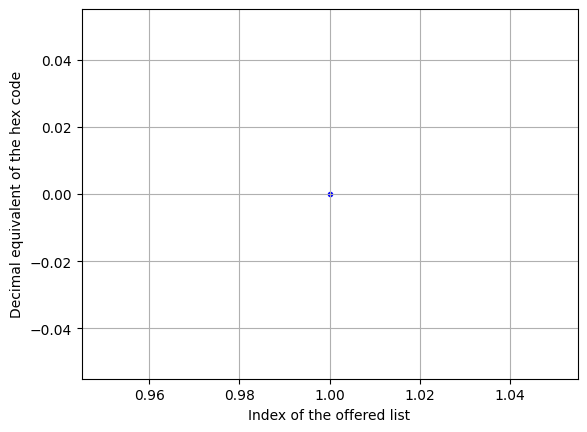

device_name: LiFXBulb


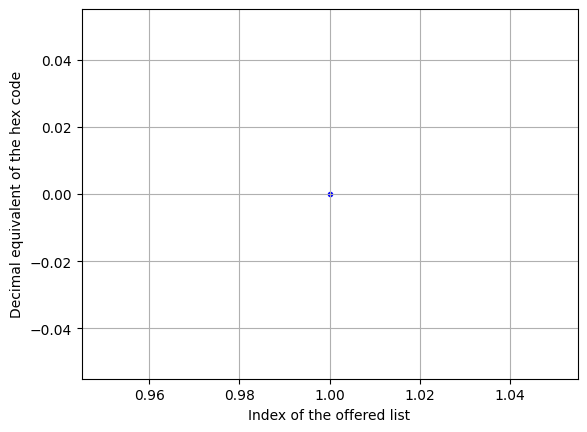

device_name: PixStarPhotoFrame


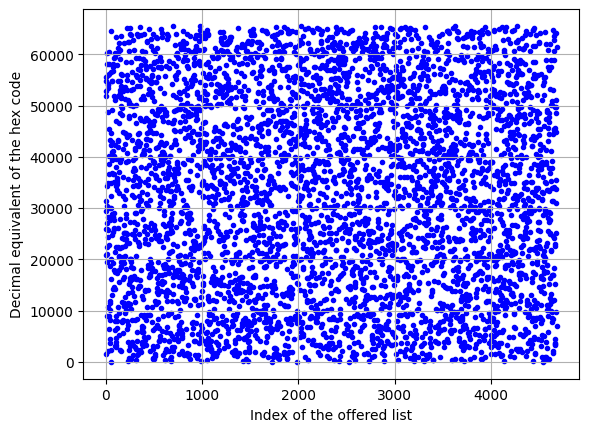

device_name: RingDoorBell


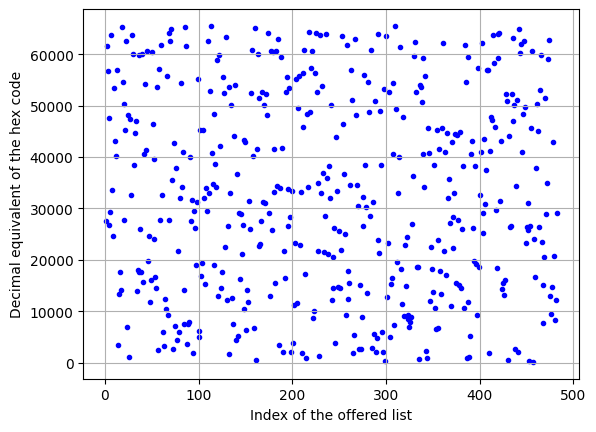

device_name: TPLinkCamera


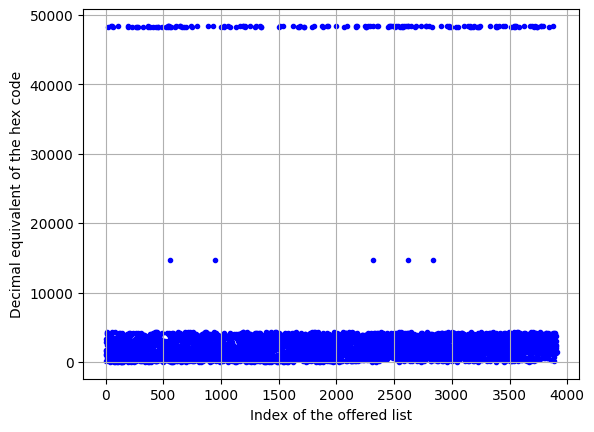

device_name: TribySpeaker


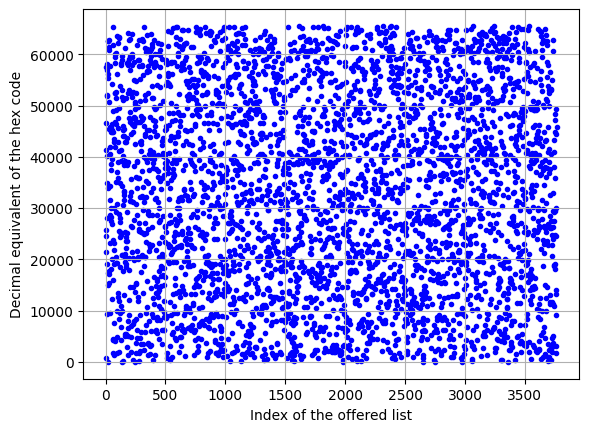

device_name: AmazonEcho


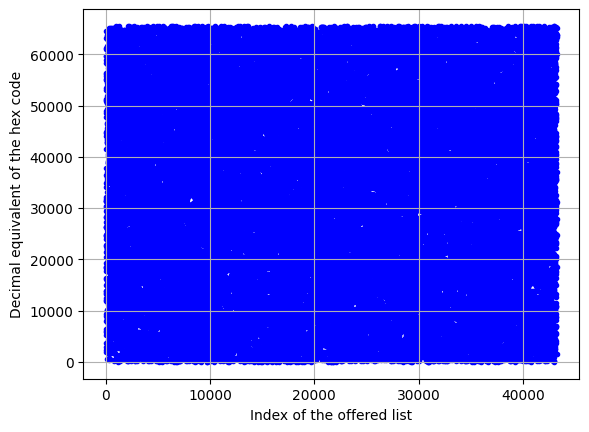

device_name: WithingsSleepSensor


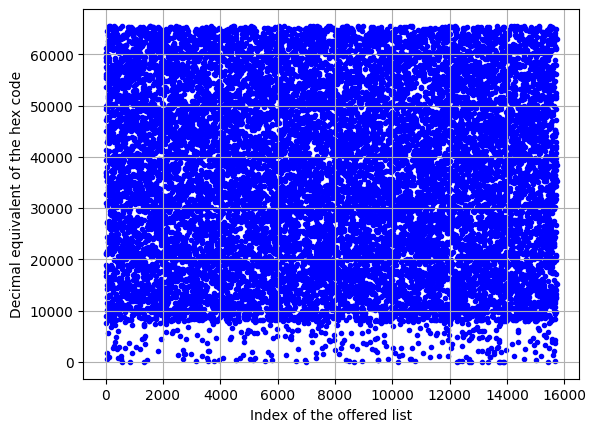

device_name: SamsungCamera


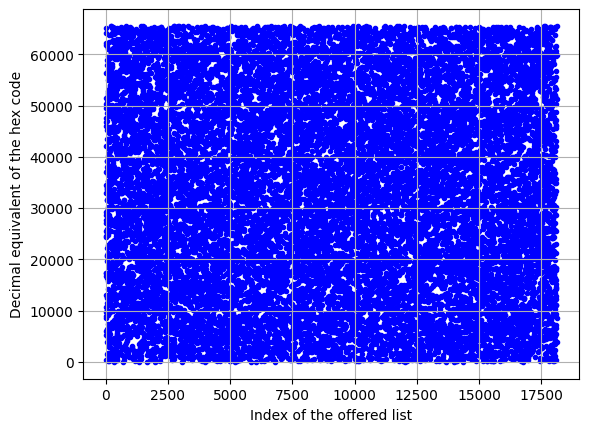

device_name: WithingsBabyMonitor


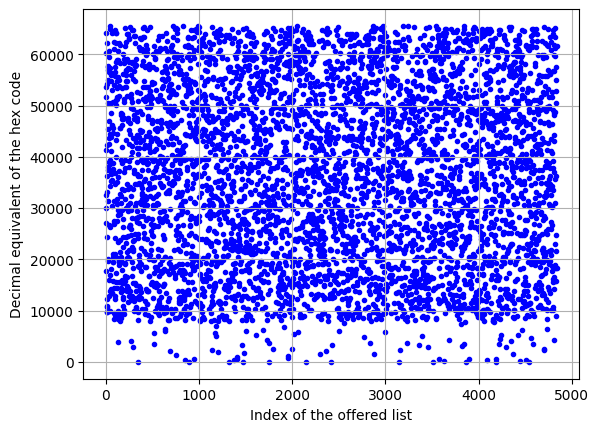

In [18]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_transID.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    print(f'device_name: {device_name}')
    plot_list_as_line_plt(css, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)